# The Sparks Foundation GRIP

# TASK-2, Prediction Using Unsupervised ML

# Author - Payal Verma

AIM- From the given 'iris' dataset, predict the optimum number of clusters and represent it visually.



# Importing Relevant Libraries


In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score




# Importing Dataset

In [3]:
df = pd.read_csv("C:\\Users\\Payal verma\\Downloads\\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# Checking information
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Counting each species present in the dataset
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

All species are in same quantities.

In [12]:
# checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values present in our data.

# Modelling


In [22]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6842388053947471
For n_clusters=3, the silhouette score is 0.5496681486718055
For n_clusters=4, the silhouette score is 0.5080853407995718
For n_clusters=5, the silhouette score is 0.4875665764567979
For n_clusters=6, the silhouette score is 0.37327826715548
For n_clusters=7, the silhouette score is 0.3704839098252582
For n_clusters=8, the silhouette score is 0.37387937489299766


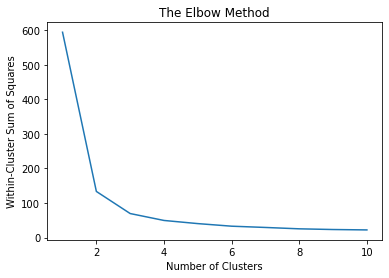

In [16]:
#The Elbow Curve
x = df.iloc[:,1:4]
wcss= []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

From both the analysis we can choose the number of clusters as 3

# normalizing the data


In [57]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x)
x=scalar.transform(x)
x

array([[0.22222222, 0.625     , 0.06779661],
       [0.16666667, 0.41666667, 0.06779661],
       [0.11111111, 0.5       , 0.05084746],
       [0.08333333, 0.45833333, 0.08474576],
       [0.19444444, 0.66666667, 0.06779661],
       [0.30555556, 0.79166667, 0.11864407],
       [0.08333333, 0.58333333, 0.06779661],
       [0.19444444, 0.58333333, 0.08474576],
       [0.02777778, 0.375     , 0.06779661],
       [0.16666667, 0.45833333, 0.08474576],
       [0.30555556, 0.70833333, 0.08474576],
       [0.13888889, 0.58333333, 0.10169492],
       [0.13888889, 0.41666667, 0.06779661],
       [0.        , 0.41666667, 0.01694915],
       [0.41666667, 0.83333333, 0.03389831],
       [0.38888889, 1.        , 0.08474576],
       [0.30555556, 0.79166667, 0.05084746],
       [0.22222222, 0.625     , 0.06779661],
       [0.38888889, 0.75      , 0.11864407],
       [0.22222222, 0.75      , 0.08474576],
       [0.30555556, 0.58333333, 0.11864407],
       [0.22222222, 0.70833333, 0.08474576],
       [0.

In [73]:
centroid = kmeans.cluster_centers_

In [84]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(x)
y_kmeans_predict = y_kmeans.predict(x)
y_kmeans_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])


# Visualising the Clusters

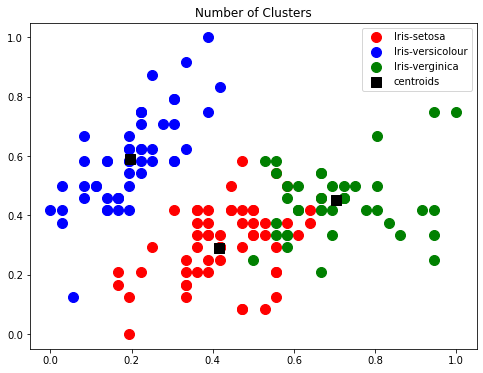

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeanspredict ==0,0], x[y_kmeanspredict ==0,1], s=100, c='r', 
label='Iris-setosa')
plt.scatter(x[y_kmeanspredict ==1,0], x[y_kmeanspredict ==1,1], s=100, c='b',
label = 'Iris-versicolour')    
plt.scatter(x[y_kmeanspredict ==2,0], x[y_kmeanspredict ==2,1], s=100, c='g',
label = 'Iris-verginica')  
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, marker=',', c='black', label= 'centroids')
plt.title('Number of Clusters')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


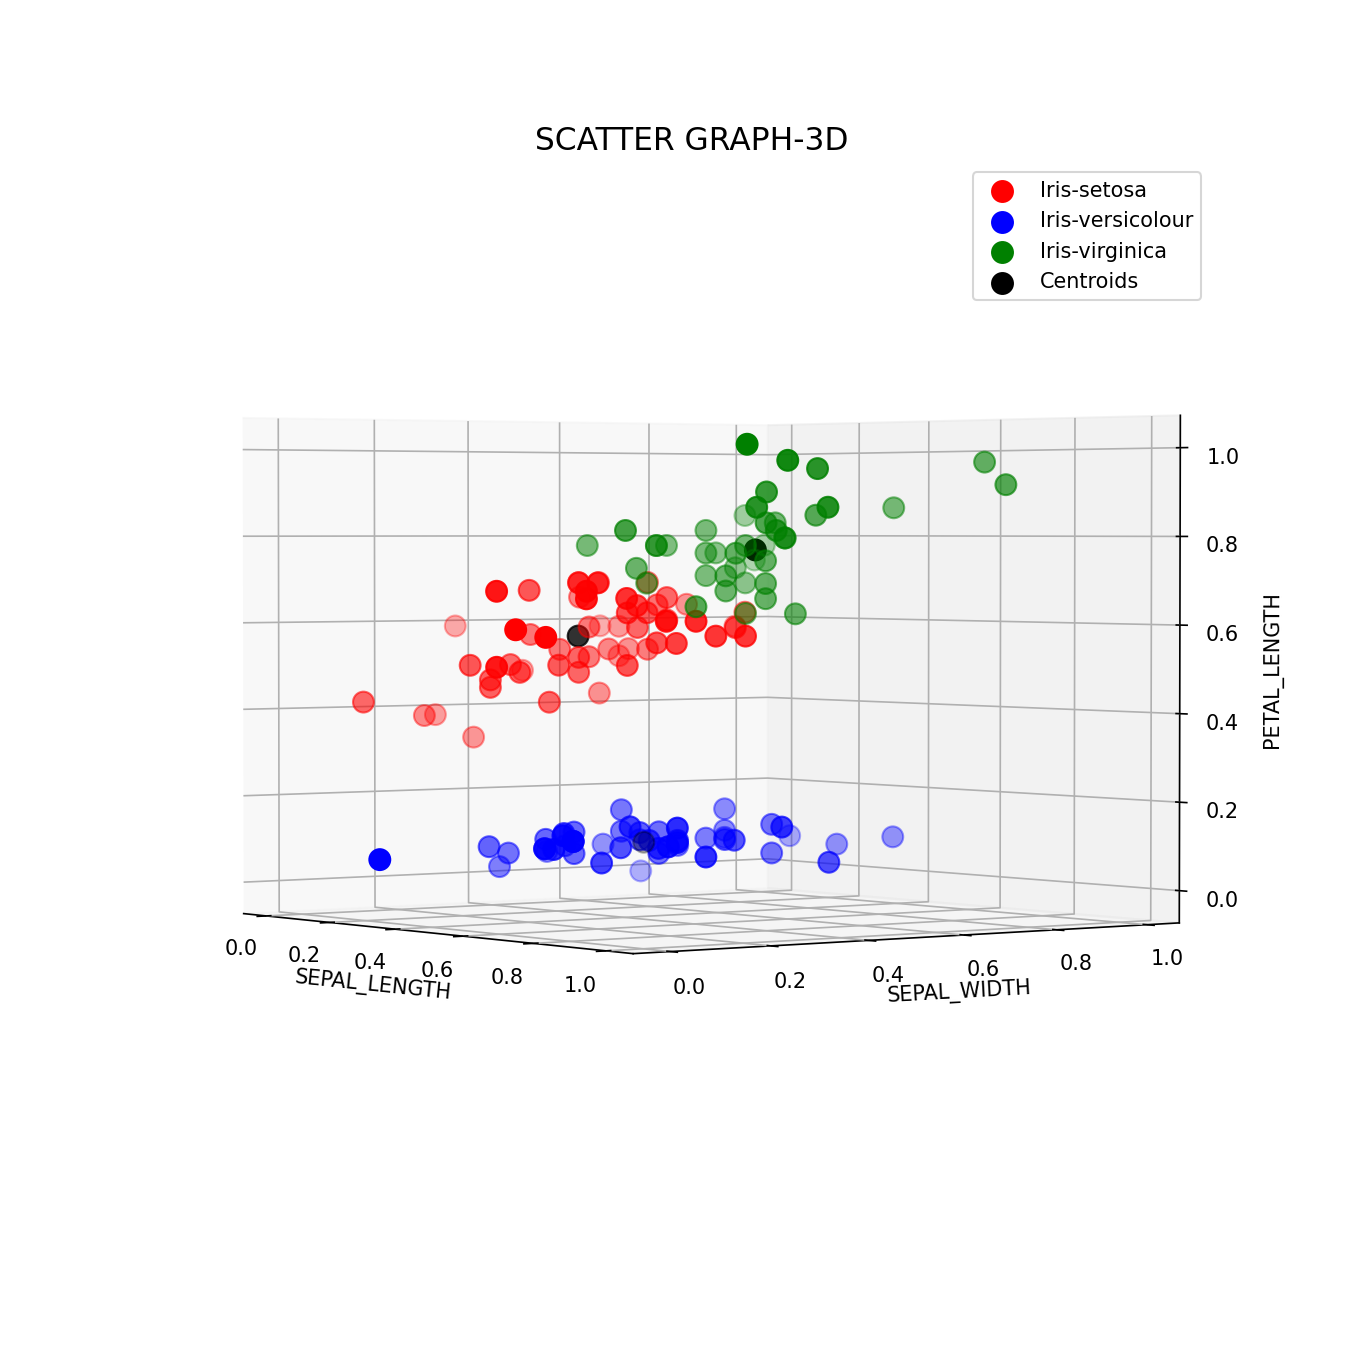

In [88]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeanspredict == 0, 0],x[y_kmeanspredict == 0, 1], x[y_kmeanspredict == 0, 2],
        s =100,c='red', label = 'Iris-setosa')
ax.scatter(x[y_kmeanspredict == 1, 0], x[y_kmeanspredict == 1, 1], x[y_kmeanspredict == 1, 2],
            s =100,c= 'blue', label = 'Iris-versicolour')
ax.scatter(x[y_kmeanspredict == 2, 0], x[y_kmeanspredict == 2, 1], x[y_kmeanspredict == 2, 2],
            s =100,c='green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')


ax.set_title('SCATTER GRAPH-3D',fontsize=15)
ax.set_xlabel('SEPAL_LENGTH',fontsize=10)
ax.set_ylabel('SEPAL_WIDTH',fontsize=10)
ax.set_zlabel('PETAL_LENGTH',fontsize=10) 
plt.legend()